## Loading the Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
folder_path = "dataset/"
train_x_file = "AMF_train_X_XCZw8r3.csv"
train_y_file = "AMF_train_Y_omYQJZL.csv"
test_x_file = "AMF_test_X_uDs0jHH.csv"
train_X = pd.read_csv(folder_path + train_x_file)
train_y = pd.read_csv(folder_path + train_y_file)
test_X = pd.read_csv(folder_path + test_x_file)

In [3]:
# Merging train data X and y
train_df = train_X.merge(train_y, on='Trader')

## Data Preprocessing

In [4]:
# Need numerical values to calculate correlation between data
df = train_df.replace(['NON HFT', 'MIX', 'HFT'], [0, 1, 2])

In [5]:
# Keeping the 35 features and the output
columns_to_keep = list(df.columns)[4:]
df = df[columns_to_keep]

## Some visualization

In [6]:
df.head(5)

OTR        OCR         OMR  min_time_two_events  mean_time_two_events  \
0  2.272727   8.333333   12.500000                  0.0           5117.830300   
1  1.696629  25.166667   21.571429                  0.0           1846.968401   
2  1.482759  47.300000  118.250000                  0.0            686.300630   
3  1.705882  14.500000   29.000000                  0.0           2174.335265   
4  1.517730  26.750000         NaN                  0.0            944.008551   

   10_p_time_two_events  med_time_two_events  25_p_time_two_events  \
0              0.000000           419.688500             10.722543   
1              0.000074             0.003374              0.000204   
2              0.000071             0.000599              0.000129   
3              0.000000             6.152666              0.000945   
4              0.000071             0.001364              0.000146   

   75_p_time_two_events  90_p_time_two_events  ...  mean_dt_TV1_TV2  \
0            984.320560           23151.83800  ...              NaN   
1              8.768699            2671.48830  ...              NaN   
2              5.725427             448.88360  ...              NaN   
3             62.444176           19187.71900  ...              NaN   
4              2.225420             273.45676  ...              NaN   

   med_dt_TV1_TV2  min_dt_TV1_TV3  mean_dt_TV1_TV3  med_dt_TV1_TV3  \
0             NaN             NaN              NaN             NaN   
1             NaN             NaN              NaN             NaN   
2             NaN             NaN              NaN             NaN   
3             NaN             NaN              NaN             NaN   
4             NaN             NaN              NaN             NaN   

   min_dt_TV1_TV4  mean_dt_TV1_TV4  med_dt_TV1_TV4  \
0             NaN              NaN             NaN   
1             NaN              NaN             NaN   
2             NaN              NaN             NaN   
3             NaN              NaN             NaN   
4             NaN              NaN             NaN   

   NbSecondWithAtLeatOneTrade  type  
0                           4     0  
1                          15     0  
2                          63     0  
3                           4     0  
4                          38     0  

[5 rows x 36 columns]

In [7]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105782 entries, 0 to 105781
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OTR                         104099 non-null  float64
 1   OCR                         105782 non-null  float64
 2   OMR                         58170 non-null   float64
 3   min_time_two_events         105782 non-null  float64
 4   mean_time_two_events        105782 non-null  float64
 5   10_p_time_two_events        105782 non-null  float64
 6   med_time_two_events         105782 non-null  float64
 7   25_p_time_two_events        105782 non-null  float64
 8   75_p_time_two_events        105782 non-null  float64
 9   90_p_time_two_events        105782 non-null  float64
 10  max_time_two_events         105782 non-null  float64
 11  min_lifetime_cancel         105782 non-null  float64
 12  mean_lifetime_cancel        105782 non-null  float64
 13  10_p_lifetime_

(None, (105782, 36))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef1c9354d0>,
      dtype=object)

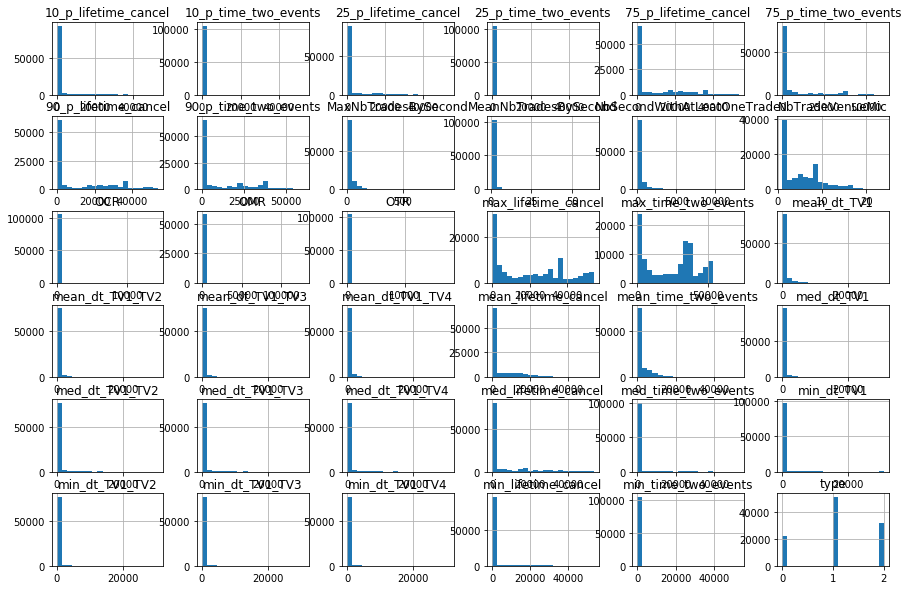

In [8]:
df.hist(bins=20, figsize=(15,10))

## Correlation analysis

In [9]:
# Computing correlation table, excluding NA/null values
abs(df.corr())

OTR       OCR       OMR  min_time_two_events  \
OTR                         1.000000  0.096018  0.027422             0.005710   
OCR                         0.096018  1.000000  0.015963             0.006657   
OMR                         0.027422  0.015963  1.000000             0.004364   
min_time_two_events         0.005710  0.006657  0.004364             1.000000   
mean_time_two_events        0.103429  0.023246  0.011293             0.312642   
10_p_time_two_events        0.003760  0.005299  0.005900             0.960057   
med_time_two_events         0.030230  0.005191  0.012933             0.319149   
25_p_time_two_events        0.007690  0.000625  0.009820             0.676722   
75_p_time_two_events        0.065570  0.002164  0.011315             0.150869   
90_p_time_two_events        0.104043  0.018882  0.005518             0.092308   
max_time_two_events         0.175884  0.000186  0.016287             0.028332   
min_lifetime_cancel         0.000377  0.194632  0.038262             0.235248   
mean_lifetime_cancel        0.070645  0.185091  0.023456             0.155316   
10_p_lifetime_cancel        0.003808  0.190817  0.036934             0.229458   
med_lifetime_cancel         0.049336  0.164881  0.015889             0.154132   
25_p_lifetime_cancel        0.019626  0.179156  0.032729             0.203099   
75_p_lifetime_cancel        0.071961  0.138106  0.018788             0.098641   
90_p_lifetime_cancel        0.086769  0.121536  0.013734             0.072730   
max_lifetime_cancel         0.113280  0.040667  0.003716             0.037732   
NbTradeVenueMic             0.022996  0.119905  0.139045             0.055133   
MaxNbTradesBySecond         0.070191  0.050959  0.052460             0.033042   
MeanNbTradesBySecond        0.038932  0.043748  0.019015             0.022007   
min_dt_TV1                  0.034955  0.069626  0.026435             0.016383   
mean_dt_TV1                 0.021664  0.092523  0.043991             0.011559   
med_dt_TV1                  0.026416  0.075995  0.032354             0.014398   
min_dt_TV1_TV2              0.006805  0.035270  0.029394             0.017949   
mean_dt_TV1_TV2             0.001259  0.045623  0.036416             0.013403   
med_dt_TV1_TV2              0.003049  0.040300  0.031425             0.016652   
min_dt_TV1_TV3              0.014520  0.036063  0.029654             0.013426   
mean_dt_TV1_TV3             0.006537  0.045921  0.035906             0.010255   
med_dt_TV1_TV3              0.011135  0.040696  0.031580             0.012239   
min_dt_TV1_TV4              0.014593  0.036008  0.030019             0.016034   
mean_dt_TV1_TV4             0.007518  0.045228  0.037255             0.011651   
med_dt_TV1_TV4              0.011896  0.040301  0.032138             0.014786   
NbSecondWithAtLeatOneTrade  0.014020  0.074081  0.040170             0.027009   
type                        0.195998  0.084947  0.032583             0.070129   

                            mean_time_two_events  10_p_time_two_events  \
OTR                                     0.103429              0.003760   
OCR                                     0.023246              0.005299   
OMR                                     0.011293              0.005900   
min_time_two_events                     0.312642              0.960057   
mean_time_two_events                    1.000000              0.347357   
10_p_time_two_events                    0.347357              1.000000   
med_time_two_events                     0.732070              0.365484   
25_p_time_two_events                    0.485610              0.758248   
75_p_time_two_events                    0.775113              0.170310   
90_p_time_two_events                    0.741386              0.104196   
max_time_two_events                     0.418262              0.032716   
min_lifetime_cancel                     0.346958              0.240274   
mean_lifetime_cancel                    0.669513              0.162367   

### Correlation with the output 
We will delete the features that are not correlated with the output.

In [10]:
abs(df.corr()['type']).sort_values(ascending=False)

type                          1.000000
NbTradeVenueMic               0.379408
mean_lifetime_cancel          0.347501
max_time_two_events           0.346483
90_p_lifetime_cancel          0.320039
75_p_lifetime_cancel          0.292717
mean_time_two_events          0.280505
min_lifetime_cancel           0.271708
90_p_time_two_events          0.261911
10_p_lifetime_cancel          0.261134
max_lifetime_cancel           0.260645
med_lifetime_cancel           0.253263
25_p_lifetime_cancel          0.247415
NbSecondWithAtLeatOneTrade    0.226033
OTR                           0.195998
75_p_time_two_events          0.150222
MeanNbTradesBySecond          0.120394
med_time_two_events           0.111604
25_p_time_two_events          0.109871
mean_dt_TV1                   0.103562
mean_dt_TV1_TV4               0.094853
mean_dt_TV1_TV2               0.092943
mean_dt_TV1_TV3               0.086726
OCR                           0.084947
med_dt_TV1_TV4                0.083924
med_dt_TV1_TV2           

<b> To delete : <br>
    'min_dt_TV1'

### Correlation between features

In [12]:
abs(df.corr()['OTR']).sort_values(ascending=False)[1:5]

type                    0.195998
max_time_two_events     0.175884
max_lifetime_cancel     0.113280
90_p_time_two_events    0.104043
Name: OTR, dtype: float64

In [13]:
abs(df.corr()['OCR']).sort_values(ascending=False)[1:5]

min_lifetime_cancel     0.194632
10_p_lifetime_cancel    0.190817
mean_lifetime_cancel    0.185091
25_p_lifetime_cancel    0.179156
Name: OCR, dtype: float64

In [14]:
abs(df.corr()['OMR']).sort_values(ascending=False)[1:5]

NbTradeVenueMic               0.139045
MaxNbTradesBySecond           0.052460
mean_dt_TV1                   0.043991
NbSecondWithAtLeatOneTrade    0.040170
Name: OMR, dtype: float64

In [15]:
abs(df.corr()['min_time_two_events']).sort_values(ascending=False)[1:5]

10_p_time_two_events    0.960057
25_p_time_two_events    0.676722
med_time_two_events     0.319149
mean_time_two_events    0.312642
Name: min_time_two_events, dtype: float64

<b> To delete : <br>
    '10_p_time_two_events'

In [16]:
abs(df.corr()['mean_time_two_events']).sort_values(ascending=False)[1:5]

75_p_time_two_events    0.775113
90_p_time_two_events    0.741386
med_time_two_events     0.732070
mean_lifetime_cancel    0.669513
Name: mean_time_two_events, dtype: float64

In [17]:
abs(df.corr()['med_time_two_events']).sort_values(ascending=False)[1:5]

mean_time_two_events    0.732070
25_p_time_two_events    0.580420
75_p_time_two_events    0.527381
10_p_time_two_events    0.365484
Name: med_time_two_events, dtype: float64

In [18]:
abs(df.corr()['25_p_time_two_events']).sort_values(ascending=False)[1:5]

10_p_time_two_events    0.758248
min_time_two_events     0.676722
med_time_two_events     0.580420
mean_time_two_events    0.485610
Name: 25_p_time_two_events, dtype: float64

In [19]:
abs(df.corr()['75_p_time_two_events']).sort_values(ascending=False)[1:5]

mean_time_two_events    0.775113
90_p_time_two_events    0.733030
med_time_two_events     0.527381
mean_lifetime_cancel    0.481463
Name: 75_p_time_two_events, dtype: float64

In [20]:
abs(df.corr()['90_p_time_two_events']).sort_values(ascending=False)[1:5]

mean_time_two_events    0.741386
75_p_time_two_events    0.733030
90_p_lifetime_cancel    0.624614
75_p_lifetime_cancel    0.591107
Name: 90_p_time_two_events, dtype: float64

In [21]:
abs(df.corr()['max_time_two_events']).sort_values(ascending=False)[1:5]

max_lifetime_cancel     0.802599
90_p_time_two_events    0.521664
90_p_lifetime_cancel    0.520599
75_p_lifetime_cancel    0.427638
Name: max_time_two_events, dtype: float64

In [22]:
abs(df.corr()['min_lifetime_cancel']).sort_values(ascending=False)[1:5]

10_p_lifetime_cancel    0.980872
25_p_lifetime_cancel    0.879184
mean_lifetime_cancel    0.701790
med_lifetime_cancel     0.686939
Name: min_lifetime_cancel, dtype: float64

<b> To delete : <br>
    '10_p_lifetime_cancel', '25_p_lifetime_cancel'

In [23]:
abs(df.corr()['mean_lifetime_cancel']).sort_values(ascending=False)[1:5]

med_lifetime_cancel     0.924730
75_p_lifetime_cancel    0.857497
25_p_lifetime_cancel    0.818416
90_p_lifetime_cancel    0.796634
Name: mean_lifetime_cancel, dtype: float64

<b> To delete : <br>
    'med_lifetime_cancel', '75_p_lifetime_cancel'

In [24]:
abs(df.corr()['max_lifetime_cancel']).sort_values(ascending=False)[1:5]

max_time_two_events     0.802599
90_p_lifetime_cancel    0.670777
75_p_lifetime_cancel    0.565385
mean_lifetime_cancel    0.521816
Name: max_lifetime_cancel, dtype: float64

In [25]:
abs(df.corr()['90_p_lifetime_cancel']).sort_values(ascending=False)[1:5]

75_p_lifetime_cancel    0.882121
mean_lifetime_cancel    0.796634
max_lifetime_cancel     0.670777
med_lifetime_cancel     0.645157
Name: 90_p_lifetime_cancel, dtype: float64

In [26]:
abs(df.corr()['NbTradeVenueMic']).sort_values(ascending=False)[1:5]

NbSecondWithAtLeatOneTrade    0.410339
type                          0.379408
mean_lifetime_cancel          0.310066
MaxNbTradesBySecond           0.292939
Name: NbTradeVenueMic, dtype: float64

In [27]:
abs(df.corr()['MaxNbTradesBySecond']).sort_values(ascending=False)[1:5]

NbSecondWithAtLeatOneTrade    0.514628
NbTradeVenueMic               0.292939
max_lifetime_cancel           0.237717
max_time_two_events           0.236983
Name: MaxNbTradesBySecond, dtype: float64

In [28]:
abs(df.corr()['MeanNbTradesBySecond']).sort_values(ascending=False)[1:5]

MaxNbTradesBySecond     0.135460
type                    0.120394
mean_lifetime_cancel    0.092306
90_p_lifetime_cancel    0.089090
Name: MeanNbTradesBySecond, dtype: float64

In [29]:
abs(df.corr()['min_dt_TV1']).sort_values(ascending=False)[1:5]

med_dt_TV1        0.976866
mean_dt_TV1       0.901376
min_dt_TV1_TV3    0.805096
min_dt_TV1_TV2    0.799584
Name: min_dt_TV1, dtype: float64

In [33]:
abs(df.corr()['mean_dt_TV1']).sort_values(ascending=False)[1:5]

med_dt_TV1         0.929938
min_dt_TV1         0.901376
mean_dt_TV1_TV3    0.863634
mean_dt_TV1_TV2    0.858473
Name: mean_dt_TV1, dtype: float64

In [34]:
abs(df.corr()['med_dt_TV1']).sort_values(ascending=False)[1:5]

min_dt_TV1        0.976866
mean_dt_TV1       0.929938
med_dt_TV1_TV3    0.819230
min_dt_TV1_TV3    0.817047
Name: med_dt_TV1, dtype: float64

<b> To delete : <br>
    'min_dt_TV1', 'mean_dt_TV1'

In [38]:
abs(df.corr()['mean_dt_TV1_TV2']).sort_values(ascending=False)[1:10]

mean_dt_TV1_TV3    0.977959
mean_dt_TV1_TV4    0.968212
med_dt_TV1_TV2     0.944940
med_dt_TV1_TV3     0.935089
min_dt_TV1_TV2     0.930909
min_dt_TV1_TV3     0.924274
med_dt_TV1_TV4     0.922590
min_dt_TV1_TV4     0.911615
mean_dt_TV1        0.858473
Name: mean_dt_TV1_TV2, dtype: float64

<b> To delete : <br>
'mean_dt_TV1_TV3', 'mean_dt_TV1_TV4', 'med_dt_TV1_TV2', 'med_dt_TV1_TV3', 'min_dt_TV1_TV2', 'min_dt_TV1_TV3', 'med_dt_TV1_TV4', 'min_dt_TV1_TV4' 

In [39]:
abs(df.corr()['NbSecondWithAtLeatOneTrade']).sort_values(ascending=False)[1:5]

MaxNbTradesBySecond     0.514628
NbTradeVenueMic         0.410339
mean_lifetime_cancel    0.240821
type                    0.226033
Name: NbSecondWithAtLeatOneTrade, dtype: float64

In [40]:
# Features to delete
fcor_to_delete = ['min_dt_TV1',
                  '10_p_time_two_events', 
                  '10_p_lifetime_cancel', '25_p_lifetime_cancel', 'med_lifetime_cancel', '75_p_lifetime_cancel', 
                  'min_dt_TV1', 'mean_dt_TV1',
                  'mean_dt_TV1_TV3', 'mean_dt_TV1_TV4', 'med_dt_TV1_TV2', 'med_dt_TV1_TV3', 'min_dt_TV1_TV2', 'min_dt_TV1_TV3', 'med_dt_TV1_TV4', 'min_dt_TV1_TV4'
                  ]